In [1]:
import numpy as np
import scipy.io as scio
from dream_utils import *

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskElasticNetCV

# plotting
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'font.size': 30,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': True,
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
colors = [
    '#377eb8', '#ff7f00', '#4daf4a', 
    '#f781bf', '#a65628', '#984ea3',
    '#999999', '#e41a1c', '#dede00'
]

In [3]:
dream = DREAM(data_path='stevenson/data/Stevenson_2011_e1.mat')

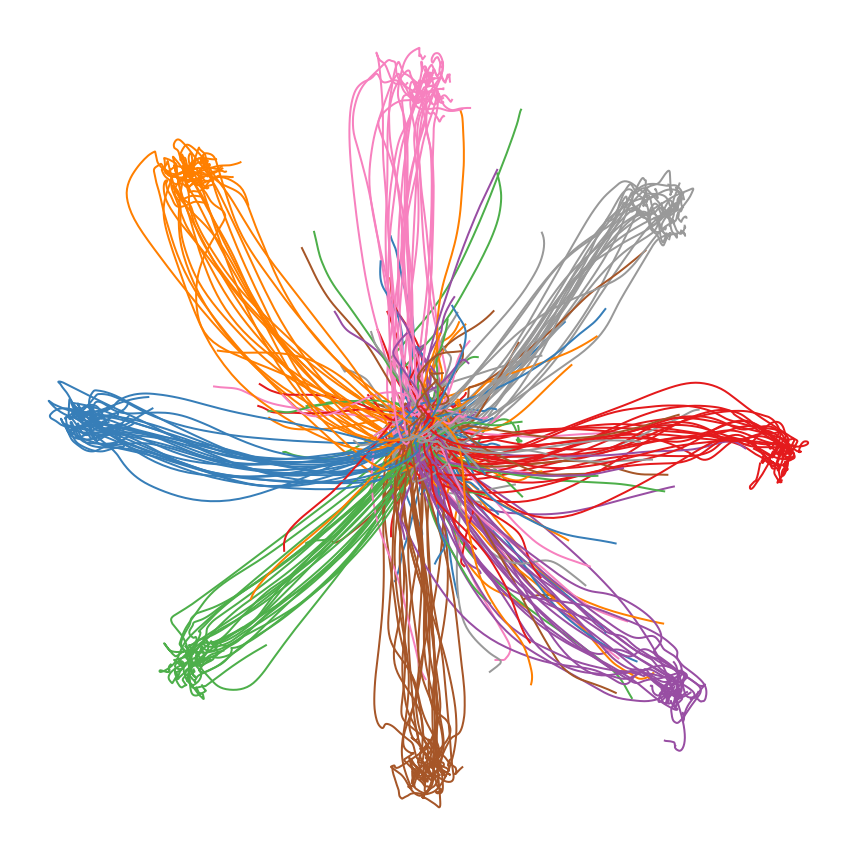

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
targets, center = dream.get_targets(subject_idx=0)
ax.set_xticks([])
ax.set_yticks([])
for trial in range(dream.n_trials[0]):
    cur_target = dream.get_target_for_trial(0, trial_idx=trial)
    if cur_target is not None:
        hand_pos_x, hand_pos_y = dream.get_hand_pos_for_trial(subject_idx=0, trial_idx=trial)
        target_idx = np.argwhere([np.allclose(cur_target, targets[idx]) for idx in range(targets.shape[0])])[0,0]
        plt.plot(hand_pos_x[25:-150], hand_pos_y[25:-150], color=colors[target_idx], linewidth=2)
ax.axis('off')
plt.tight_layout()
plt.savefig('figure1a-m1.pdf')
plt.show()

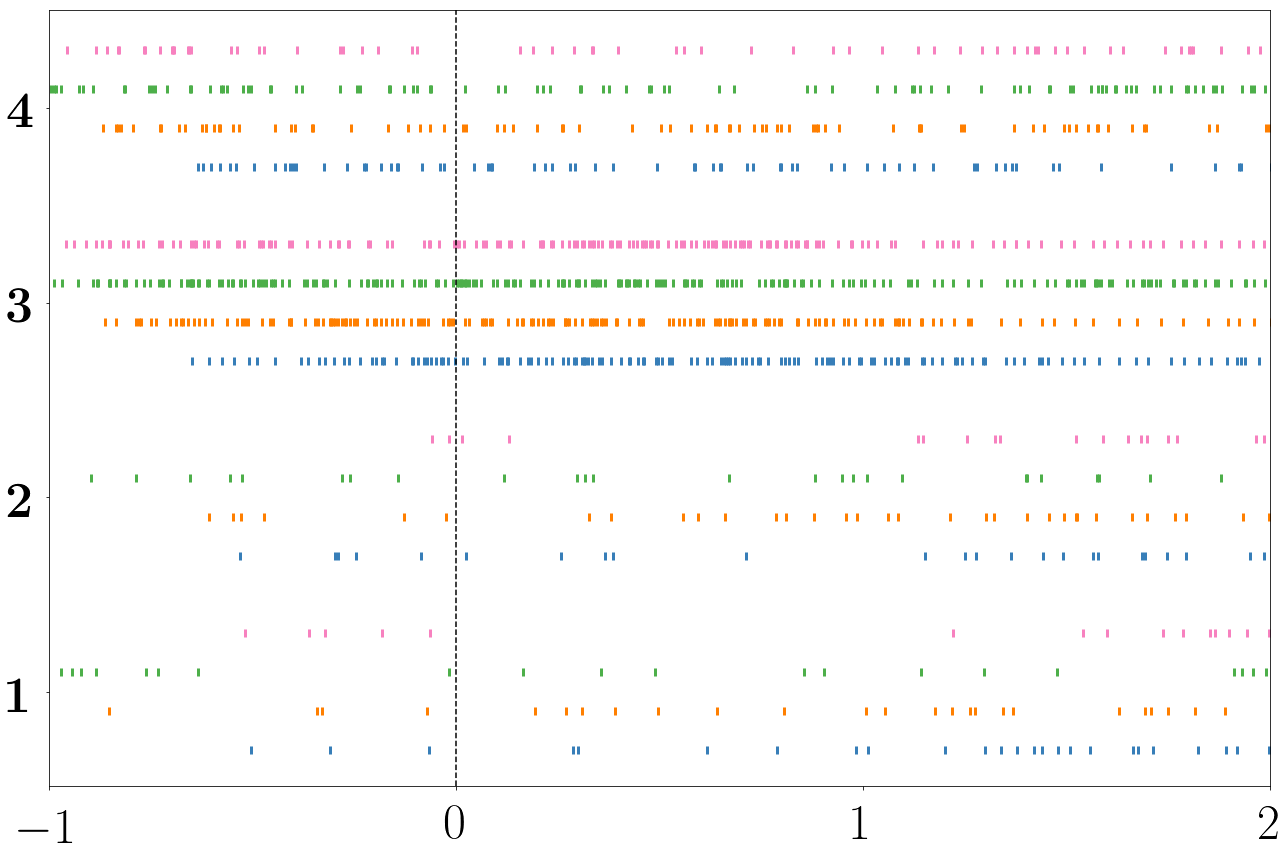

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
trials = [5, 7, 1, 4]
neurons = [1, 3, 4, 20]
for trial_idx, trial_id in enumerate(trials):
    timestamps = dream.get_timestamps_for_trial(0, trial_idx=trial_id)
    angle = dream.get_angle_for_trial(subject_idx=0, trial_idx=trial_id)
    onset_idx = dream.get_stim_onset_for_trial(subject_idx=0, trial_idx=trial_id)
    stim_onset = timestamps[onset_idx]
    for neuron_idx, neuron_id in enumerate(neurons):
        spike_times = dream.get_spikes_for_trial_and_neuron(subject_idx=0, trial_idx=trial_id, neuron_idx=neuron_id) - stim_onset
        tags = np.repeat(2.5 * neuron_idx + 0.5 * trial_idx, spike_times.size)
        ax.scatter(spike_times, tags, marker='|', linewidth=3, s=75,  color=colors[int(angle/90)])
ax.set_facecolor('white')
for spine in ax.spines:
    ax.spines[spine].set_edgecolor('k')
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xlim([-1, 2])
ax.tick_params(labelsize=50, pad=10)
ax.set_xticks([-1, 0, 1, 2])
ax.set_yticks(np.array([0., 2.5, 5.0, 7.5]) + 0.75)
ax.set_yticklabels([r'\textbf{1}', r'\textbf{2}', r'\textbf{3}', r'\textbf{4}'])
ax.axvline(0, linestyle='--', color='k')
plt.tight_layout()
plt.savefig('figure1a-raster.pdf')